In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom



Number of DICOM images: 133
Image dimensions: (512, 512)
Pixel spacing: [0.703125, 0.703125]


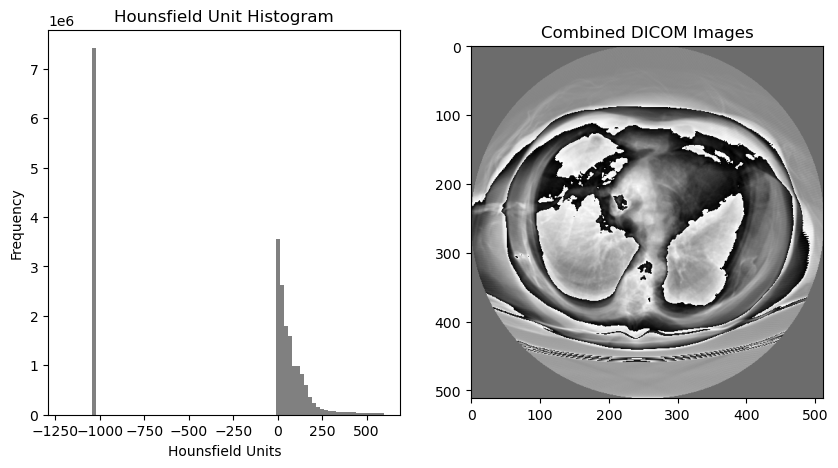

In [3]:
import os
import numpy as np
import pydicom
import matplotlib.pyplot as plt

# Set the directory path
dir_path = 'C:/Users/AKSHAT/Documents/cpcode/dataset/manifest-1682931143289/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192'

# Load the DICOM images into a list
dicom_list = []
for filename in os.listdir(dir_path):
    if filename.endswith('.dcm'):
        dicom = pydicom.read_file(os.path.join(dir_path, filename))
        dicom_list.append(dicom)

# Print some basic information about the DICOM images
print('Number of DICOM images:', len(dicom_list))
print('Image dimensions:', dicom_list[0].pixel_array.shape)
print('Pixel spacing:', dicom_list[0].PixelSpacing)

# Plot a histogram of pixel values across all images
pixel_values = []
for dicom in dicom_list:
    pixel_values.extend(dicom.pixel_array.flatten())

plt.figure(figsize=(10, 5))

# Plot Hounsfield Unit Histogram
plt.subplot(1, 2, 1)
plt.hist(pixel_values, bins=80, range=(-1200, 600), color='gray')
plt.title('Hounsfield Unit Histogram')
plt.xlabel('Hounsfield Units')
plt.ylabel('Frequency')

# Combine DICOM images
combined_image = np.zeros_like(dicom_list[0].pixel_array)
for dicom in dicom_list:
    combined_image += dicom.pixel_array

# Plot combined image
plt.subplot(1, 2, 2)
plt.imshow(combined_image, cmap='gray')
plt.title('Combined DICOM Images')

plt.show()